In [2]:
import pandas as pd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Merging 12 months of sales data into a single csv file

In [4]:
files=[file for file in os.listdir("/content/drive/MyDrive/Sales_Data")]
all_months_data=pd.DataFrame()
for file in files:
  df=pd.read_csv("/content/drive/MyDrive/Sales_Data/"+file)
  all_months_data=pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)


In [5]:
all_data=pd.read_csv("/content/all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


###CleanUp data

In [6]:
#Drop rows with null
all_data.isna().sum()
all_data=all_data.dropna(how="all")
all_data.isna().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
#find a str that cause error
df=all_data[all_data['Order Date'].str[0:2]=="Or"]
df
all_data=all_data[all_data['Order Date'].str[0:2]!="Or"]

In [8]:
#convert columns to correct type from a string
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

###Augment data with informative columns


In [9]:
#adding Month column
#the format in date is mm/dd/yy hh:mm
all_data['Month']=all_data['Order Date'].str[0:2].astype('int32')
#all_data['Month']=all_data['Month'].astype('int32')
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700.0,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2


In [10]:
#adding a sales column
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,150502,iPhone,1,700.0,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.0


In [11]:
#adding a city state  column
def get_city(adr):
  return adr.split(',')[1]

def get_state(adr):
  return adr.split(',')[2].split(' ')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x:f'{get_city(x)} ({get_state(x)})')
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,150502,iPhone,1,700.0,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.0,Portland (ME)


###Best month for sales and amount of earnings

In [12]:
best_sales_res=all_data.groupby('Month').sum()
best_sales_res

<ipython-input-12-235909a375f8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_sales_res=all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [13]:
import matplotlib.pyplot as plt


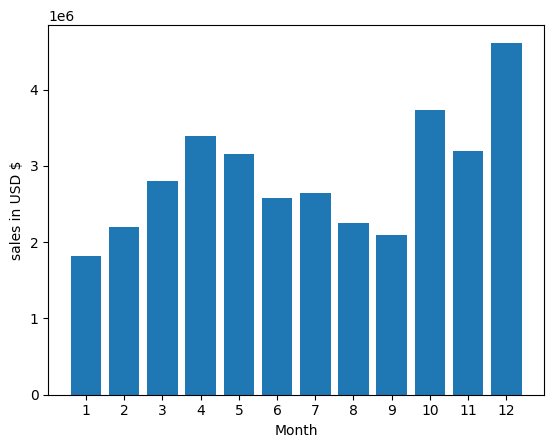

In [14]:
plt.bar(range(1,13),best_sales_res['sales'])
plt.xticks(range(1,13))
plt.ylabel("sales in USD $")
plt.xlabel("Month")
plt.show()

### City with the highest number of sales

In [15]:
best_sales_city=all_data.groupby('City').sum()
best_sales_city

<ipython-input-15-500d7c3676df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_sales_city=all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


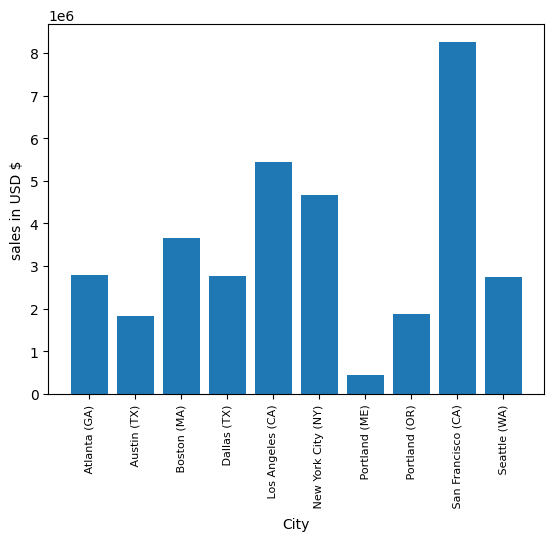

In [16]:
# cities=all_data['City'].unique() # this gives the wrong order of cities
cities=[city for city , df in all_data.groupby('City') ]

plt.bar(cities,best_sales_city['sales'])
plt.xticks(cities,rotation="vertical",size=8)
plt.ylabel("sales in USD $")
plt.xlabel("City")
plt.show()

###Finding the best time to advertise to assure that clients would buy the product

In [22]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [24]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

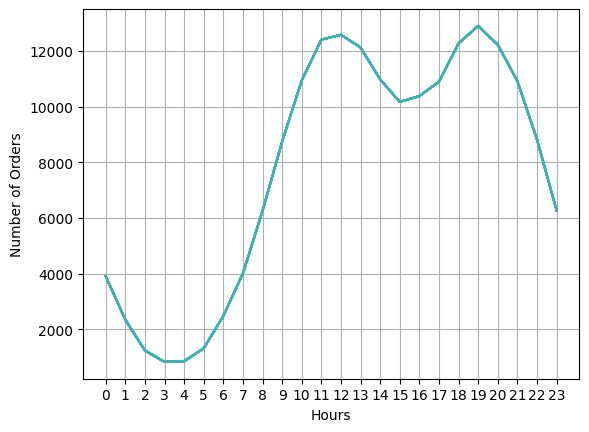

In [28]:
hours=[hour for hour , df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

###Products that are sold together

In [32]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

<ipython-input-32-938af0dbcc69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"


In [34]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key,value in  count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


###The product that sold the most

<ipython-input-36-1ffc3bb68dc0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered=product_grp.sum()['Quantity Ordered']


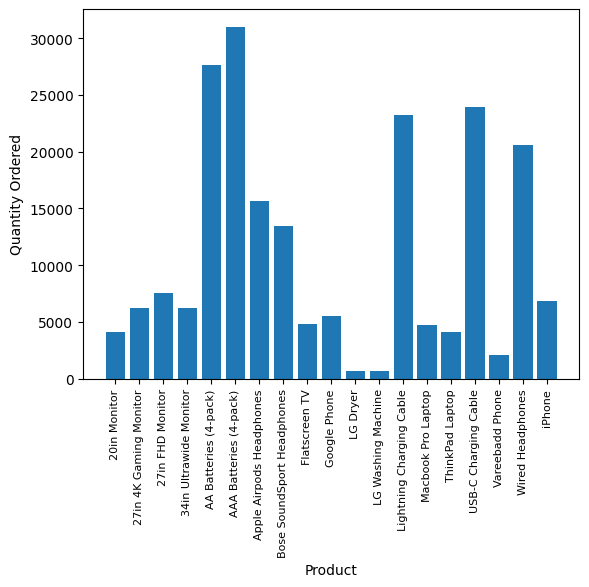

In [36]:
product_grp=all_data.groupby('Product')
quantity_ordered=product_grp.sum()['Quantity Ordered']

products=[product for product,df in product_grp]

plt.bar(products,quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products,rotation='vertical',size=8)
plt.show()

<ipython-input-39-f87977856851>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices=all_data.groupby('Product').mean()['Price Each']
<ipython-input-39-f87977856851>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


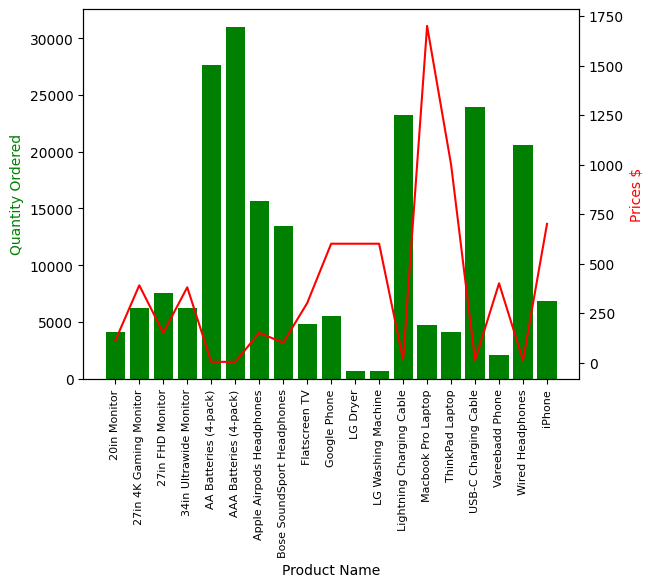

In [39]:
prices=all_data.groupby('Product').mean()['Price Each']

fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'r-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Prices $',color='red')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()